In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from db_conn import DB_conn
from sqlalchemy import inspect

In [31]:
import numpy as np
import pandas as pd
import datetime as dt

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, asc

In [33]:
# Create an engine for the hawaii.sqlite database
engine = create_engine(DB_conn)

In [43]:
import pandas as pd
df = pd.read_sql("Select * from region_incident",engine)
df.head()


,year,region_name,lga_name,incident_count,rate_per_100000pop
0,2022,1 North West Metro,Banyule,5244,4086.865525
1,2022,1 North West Metro,Brimbank,12330,6200.959480
2,2022,1 North West Metro,Darebin,9276,5751.475727
3,2022,1 North West Metro,Hobsons Bay,4599,4804.896128
4,2022,1 North West Metro,Hume,12196,4919.684615


In [47]:
 df.to_csv()

',year,region_name,lga_name,incident_count,rate_per_100000pop\r\n0,2022,1 North West Metro,Banyule,5244,4086.865525466\r\n1,2022,1 North West Metro,Brimbank,12330,6200.959480232\r\n2,2022,1 North West Metro,Darebin,9276,5751.475727256\r\n3,2022,1 North West Metro,Hobsons Bay,4599,4804.89612819\r\n4,2022,1 North West Metro,Hume,12196,4919.684614534\r\n5,2022,1 North West Metro,Maribyrnong,7025,7486.953068068\r\n6,2022,1 North West Metro,Melbourne,25036,14582.311374876\r\n7,2022,1 North West Metro,Melton,8805,4668.504451099\r\n8,2022,1 North West Metro,Moonee Valley,6018,4685.637553682\r\n9,2022,1 North West Metro,Moreland,9173,4992.233638729\r\n10,2022,1 North West Metro,Nillumbik,1319,2063.770802694\r\n11,2022,1 North West Metro,Whittlesea,8939,3720.498248721\r\n12,2022,1 North West Metro,Wyndham,12094,4048.936235895\r\n13,2022,1 North West Metro,Yarra,8790,8734.362735294\r\n14,2022,2 Eastern,Alpine,371,2827.30161542\r\n15,2022,2 Eastern,Bass Coast,2147,5360.565038689\r\n16,2022,2 East

In [22]:
# Query tables/columns using metadata function
from sqlalchemy import MetaData
m = MetaData()
m.reflect(engine)
for table in m.tables.values():
    print("Table ======== "+ table.name)
    for column in table.c:
        print(column.name)

Table ======== region_incident
year
region_name
lga_name
incident_count
rate_per_100000pop
Table ======== lga_offence
year
psa_name
lga_name
offence_div_name
offence_subdiv_name
offence_subgrp_name
incident_count
psa_rate_per_100000pop
lga_rate_per_100000pop
region_name
Table ======== lga_charge_status
year
lga_name
charge_status_name
incident_count
Table ======== lga_offence_summary
year
lga_name
a_crime_vs_person
b_property_deception
c_drug_offence
d_public_order_security
e_justice_offence
f_other_offence
region_name
offence_total


# Exploratory Climate Analysis

## Precipitation Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results

### Data Cleansing

In [20]:
# Export query result for data exploration and analysis
filepath = 'prcp_12mth.csv'  
df.to_csv(filepath, index = False)

In [21]:
# Count null prcp and drop those rows
df['Prcp'].isna().sum()     # or use len(df) - df['prcp'].count()
df = df.dropna(subset=['Prcp'])
len(df)

2015

In [22]:
# Export query result for data exploration and analysis
filepath = 'clean_prcp_12mth.csv'  
df.to_csv(filepath, index = False)

### Plot precipitation chart

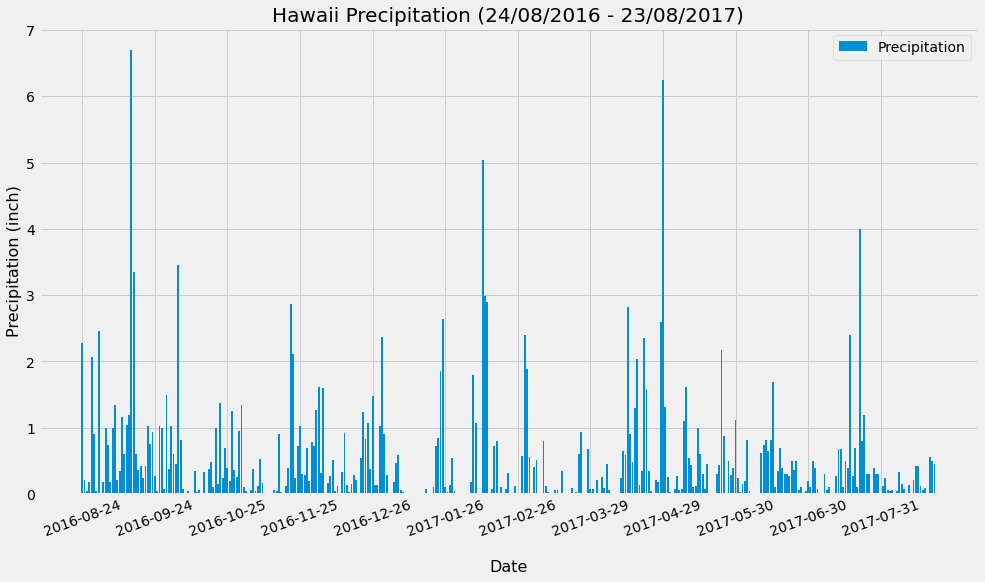

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
# Generate a scatter plot of Date vs Precipitation
label_fontsize = 16
title_fontsize = 20
plt.rcParams["figure.figsize"] = (15,8)   
xt_ranges = [0, 31, 62, 93, 124, 155, 186, 217, 248, 279, 310, 341]

plt.bar(df['Date'], df['Prcp'])
plt.ylabel('Precipitation (inch)', fontsize= label_fontsize)
plt.xlabel('\nDate', fontsize = label_fontsize)
plt.xticks(xt_ranges, rotation = 20)
plt.title("Hawaii Precipitation (24/08/2016 - 23/08/2017)", fontsize = title_fontsize);
plt.savefig("Prcp_12mth.png")
plt.legend(["Precipitation"], loc=0);


### Calculate precipitation summary statistics

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

### Find Total of stations in Hawaii

In [24]:
# Design a query to show how many stations are available in this dataset?
counts = session.query(Stn).count()
print(f"There are {counts} observation stations. ")

There are 9 observation stations. 


### Find the most active station

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.session.query(
sel = [Msm.station,
    func.count(Msm.station) ] 
msm_stations = session.query(*sel).\
    group_by(Msm.station).order_by(desc(func.count(Msm.station))).all()

df = pd.DataFrame(msm_stations, columns=['station','count'])
largest = df.loc[0, ['station', 'count']]
print(f"{largest['station']} is the most active station, with reading count of {largest['count']}")

USC00519281 is the most active station, with reading count of 2772


In [26]:
msm_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### Calculate lowest, highest, and average temperature of the most active station

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Msm.station,
    func.min(Msm.tobs),
    func.max(Msm.tobs),
    func.avg(Msm.tobs) ] 
measure_stations = session.query(*sel).filter(Msm.station == "USC00519281").all()

df = pd.DataFrame(measure_stations, columns=['Station','Min Tobs', 'Max Tobs', 'Avg Tobs'])
df


,Station,Min Tobs,Max Tobs,Avg Tobs
0,USC00519281,54.0,85.0,71.663781


### Find the last 12 months of temperature observation data for this station

In [28]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Msm.date, 
       Msm.tobs]
measure_12mths = session.query(*sel).\
    filter(func.strftime(Msm.date) > "2016-08-23",\
           Msm.station == "USC00519281" ).order_by(asc(Msm.date)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(measure_12mths, columns=['Date','Tobs'])
df.head()

,Date,Tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


### Plot a histogram with a 12 bins for the station

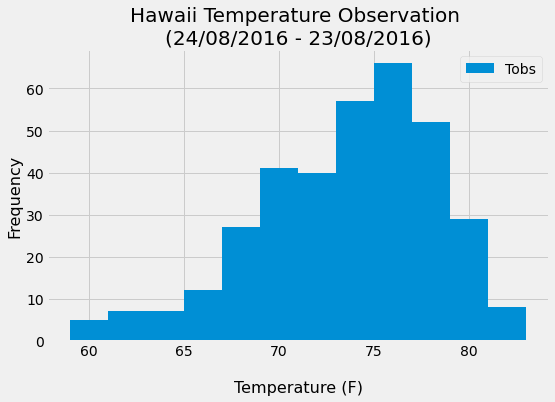

In [31]:

plt.rcParams["figure.figsize"] = (8,5)   
plt.hist(df["Tobs"], bins=12)
plt.xlabel('\nTemperature (F)',fontsize = label_fontsize)
plt.ylabel('Frequency',fontsize = label_fontsize)
plt.title('Hawaii Temperature Observation \n(24/08/2016 - 23/08/2016)', fontsize = title_fontsize)
plt.legend(["Tobs"], loc=0)
plt.savefig("Tobs_12mth.png")
plt.show();

## Bonus Challenge Assignment

#### Define function to calculate TMIN, TMAX, TAVG, TCOUNT for a date range

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):     
    sel =   [func.min(Msm.tobs),
            func.max(Msm.tobs),
            func.avg(Msm.tobs),
            func.count(Msm.tobs)]
    if start_date != '':
        if end_date != '':
            tobs = session.query(*sel).filter(Msm.date >= start_date).filter(Msm.date <= end_date).all()
        else:           
            tobs = session.query(*sel).filter(Msm.date >= start_date).all()

    tobs = list(tobs[0])    
    keys = ["Min Temp", "Max Temp", "Avg Temp", "Count Temp"]
    dict_tobs = {key: value for key, value in zip(keys, tobs)}
    return dict_tobs

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

{'Min Temp': 62.0, 'Max Temp': 74.0, 'Avg Temp': 69.57142857142857, 'Count Temp': 56}


#### Check TMIN, TMAX, TAVG, TCOUNT for my trip

In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_dates = "2017-02-28 to 2017-03-05"
avg_tobs = calc_temps('2017-02-28', '2017-03-05')
print(avg_tobs)

{'Min Temp': 64.0, 'Max Temp': 78.0, 'Avg Temp': 72.02777777777777, 'Count Temp': 36}


#### Plot bar chart for my trip with yerr 

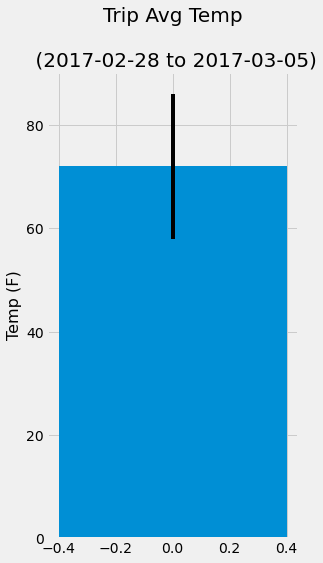

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title

plt.rcParams["figure.figsize"] = (4,8)   

# Use the average temperature for the y value; use the peak-to-peak (tmax-tmin) as the yerr
plt.bar(0, avg_tobs['Avg Temp'], yerr=(avg_tobs['Max Temp']-avg_tobs['Min Temp']))
plt.ylabel('Temp (F)', fontsize= label_fontsize)
plt.savefig("TripAvgTemp .png")
plt.title(f"Trip Avg Temp\n\n ({trip_dates})", fontsize = title_fontsize);